# Kelompok Rendang
## Anggota:
### Aurellio Fishandy    (1806199966)
### Dimas Radhitya       (1806199972)
### Mas Rafi Fauzan O. (1806200040)
### M. Fadil Hafiz           (1806148763)

###### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Metode Stochastic Gradient Descent
Dalam metode Stochastic Gradient Descent ini akan digunakan turunan fungsi Cost berdasarkan data yang dievaluasi pada setiap loop. Loop tersebut yang nantinya akan melakukan iterasi keseluruh total sampel dari input variable.

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
data  = pd.read_csv('train.csv')
features  = pd.DataFrame(data, columns = ['OverallQual'])
targets  = pd.DataFrame(data, columns = ['SalePrice'])
df = features.join(targets)
df.corr()

,OverallQual,SalePrice
OverallQual,1.000000,0.790982
SalePrice,0.790982,1.000000


In [56]:
def plot_regression(X, y, y_pred, log=None, title="Linear Regression"):
    
    plt.figure(figsize=(16,6))
    plt.rcParams['figure.dpi'] = 227
    plt.scatter(X, y, label='Data', c='#388fd8', s=6)
    if log != None:
        for i in range(len(log)):
            plt.plot(X, log[i][0]*X + log[i][1], lw=1, c='#caa727', alpha=0.35)
    plt.plot(X, y_pred, c='#ff7702', lw=3, label='Regression')
    plt.title(title, fontSize=14)
    plt.xlabel('Over', fontSize=11)
    plt.ylabel('SalePrice', fontSize=11)
    plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
    plt.tick_params(direction='out', length=6, color='#a0a0a0', width=1, grid_alpha=.6)
    plt.show()

In [57]:
def mean_squared_error(Y_true,Y_pred):
    MSE = np.square(np.subtract(Y_true,Y_pred)).mean() 
    return MSE

In [58]:
def SGD(X, y, lr=0.05, epoch=10, batch_size=1):
        
    '''
    Stochastic Gradient Descent for a single feature
    '''
    
    m, b = 0.5, 0.5 # initial parameters
    log, mse = [], [] # lists to store learning process
    
    for _ in range(epoch):
        
        indexes = np.random.randint(0, len(X), batch_size) # random sample
        
        Xs = np.take(X, indexes)
        ys = np.take(y, indexes)
        N = len(Xs)
        
        f = ys - (m*Xs + b)
        
        # Updating parameters m and b
        m -= lr * (-2 * Xs.dot(f).sum() / N)
        b -= lr * (-2 * f.sum() / N)
        
        log.append((m, b))
        mse.append(mean_squared_error(y, m*X+b))        
    
    return m, b, log, mse

In [59]:
df[['OverallQual', 'SalePrice']].describe()[1:]

,OverallQual,SalePrice
mean,6.099315,180921.195890
std,1.382997,79442.502883
min,1.000000,34900.000000
25%,5.000000,129975.000000
50%,6.000000,163000.000000
75%,7.000000,214000.000000
max,10.000000,755000.000000


In [60]:
X = df.OverallQual
y = df.SalePrice

m, b, log, mse = SGD(X, y, lr=0.01, epoch=100, batch_size=2)

MSE: 2916954976.43107


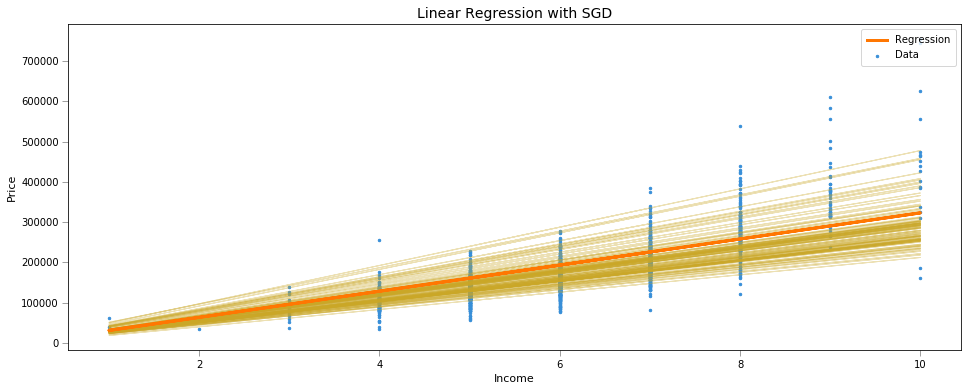

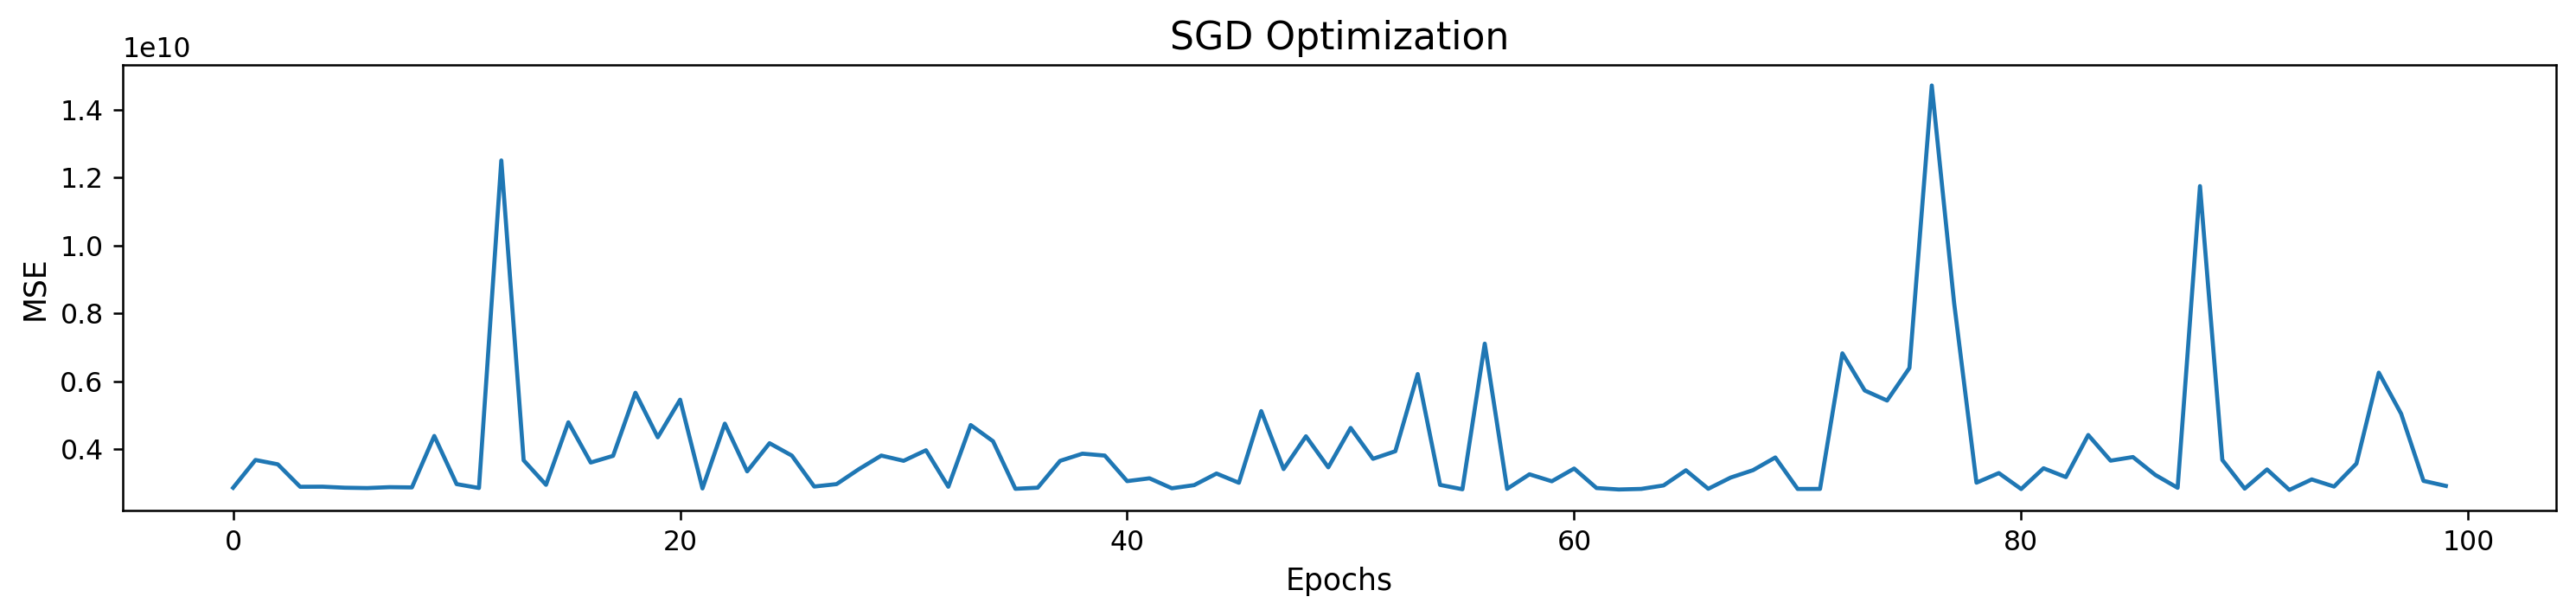

In [61]:
y_pred = m*X + b

print("MSE:",mean_squared_error(y, y_pred))
plot_regression(X, y, y_pred, log=log, title="Linear Regression with SGD")

plt.figure(figsize=(16,3))
plt.rcParams['figure.dpi'] = 227
plt.plot(range(len(mse)), mse)
plt.title('SGD Optimization', fontSize=14)
plt.xlabel('Epochs', fontSize=11)
plt.ylabel('MSE', fontSize=11)
plt.show()

#### Metode Batch Gradient Descent
Pada metode batch gradient descent ini akan digunakan turunan fungsi Cost untuk mengkomputasi tebakan selanjutnya. 

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import copy

In [6]:
train  = pd.read_csv('train.csv')

train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [7]:
data = train[['LotArea', 'SalePrice']]

data

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000
...,...,...
1455,7917,175000
1456,13175,210000
1457,9042,266500
1458,9717,142125


In [8]:
x = data['LotArea'].tolist()
y = data['SalePrice'].tolist()



# Don't forget - adding ones to the x matrix
xb = np.c_[np.ones((len(x),1)),x]
# calculate linear regression parameters theta using the normal equation
thetaHat = np.linalg.inv(xb.T.dot(xb)).dot(xb.T).dot(y)

In [9]:
learningRate = 0.0001
numIterations = 1000
m = 100

# random initialization with standard normal distribution
theta = np.random.randn(2,1)

for iteration in range(numIterations):
    s = xb.T.dot(xb.dot(theta) - y)
    gradients = 2/m * s
    theta = theta - learningRate * gradients
    #print("Ti",iteration," is: ",theta)

print("Theta BGD:", theta)

<ipython-input-9-0b5565291e82>:11: RuntimeWarning: invalid value encountered in subtract
  theta = theta - learningRate * gradients


Theta BGD: [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [10]:
def MSE(xb,y,theta):
    return np.sum(np.square(xb.dot(theta)-y))/len(y)

In [11]:
learningRate = 0.0002
numIterations = 100000
y = np.array(y).reshape(-1,1)
m = len(y) # number of samples

# random initialization with standard normal distribution
theta = np.random.randn(2,1)

cost = []
# start gradient descent
for i in range(numIterations):
    gradient = 2/m * xb.T.dot(xb.dot(theta) - y) # dimension: (2,1)
    theta = theta - learningRate * gradient
    cost.append(MSE(xb,y,theta))
    
    theta

C:\Users\aurel\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-10-8249c3158e1a>:2: RuntimeWarning: overflow encountered in square
  return np.sum(np.square(xb.dot(theta)-y))/len(y)
<ipython-input-11-d9fa83a4eca7>:13: RuntimeWarning: invalid value encountered in subtract
  theta = theta - learningRate * gradient


Text(0, 0.5, 'MSE')

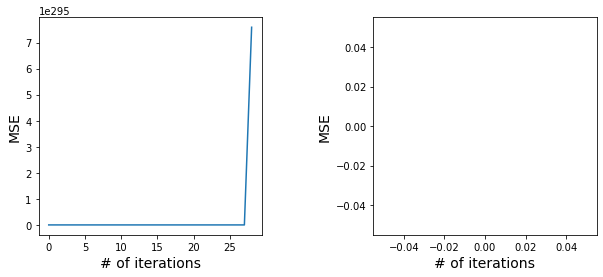

In [12]:
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))
ax[0].plot(range(0,100),cost[0:100])
ax[1].plot(range(10000,20001), cost[10000:20001])
plt.subplots_adjust(wspace=0.5)
ax[0].set_xlabel('# of iterations', fontsize = 14)
ax[1].set_xlabel('# of iterations', fontsize = 14)
ax[0].set_ylabel('MSE', fontsize = 14)
ax[1].set_ylabel('MSE', fontsize = 14)

In [13]:
theta = np.random.randn(2,1)
gradient = 2/m * xb.T.dot(xb.dot(theta) - y)
print(gradient)

[[-3.73626875e+05]
 [-4.45904191e+09]]


In [14]:
xbStandard = copy.deepcopy(xb) # we don't want to mess with xb! xbStandard = xb will lead to xb being normalized, too.
# save the shift and scaling
mu = np.mean(xbStandard[:,1]) 
sigma = np.std(xbStandard[:,1])
# standardization
xbStandard[:,1]=(xbStandard[:,1]-mu)/sigma
print(xbStandard[0:5])
print(mu)
print(sigma)

[[ 1.         -0.20714171]
 [ 1.         -0.09188637]
 [ 1.          0.07347998]
 [ 1.         -0.09689747]
 [ 1.          0.37514829]]
10516.828082191782
9977.846105448105


In [15]:
print(theta)

[[-1.10403299]
 [-0.56016296]]


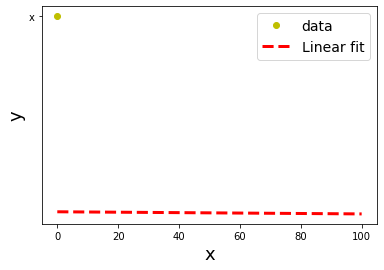

In [16]:
xFit = np.linspace(0,100,num = 200)
xFitStandard = (xFit - mu)/sigma # use the previously saved mean and standard deviation
xFitStandardb = np.c_[np.ones((len(xFitStandard),1)), xFitStandard]
yFit = xFitStandardb.dot(theta)

plt.plot('x','y',data = data, marker = 'o', linestyle = '', label = 'data')
plt.plot(xFit, yFit, color = 'r', lw = 3, linestyle = '--', label = 'Linear fit')
plt.xlabel('x',fontsize = 18)
plt.ylabel('y', fontsize = 18)
plt.legend(fontsize = 14)
plt.show()